In [ ]:
!pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 34.2 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=141919887d199a049a6b65f465838b67e3c97924635ea2e88482e3549e48096e
  Stored in directory: /root/.cache/pip/wheels/d7/e5/36/85d319586b4a405d001029d489102f526ce5546248c295932a
Successfully built pydataset


In [ ]:
import pandas as pd
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [ ]:
df = data('cancer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 1 to 228
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   inst       227 non-null    float64
 1   time       228 non-null    int64  
 2   status     228 non-null    int64  
 3   age        228 non-null    int64  
 4   sex        228 non-null    int64  
 5   ph.ecog    227 non-null    float64
 6   ph.karno   227 non-null    float64
 7   pat.karno  225 non-null    float64
 8   meal.cal   181 non-null    float64
 9   wt.loss    214 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 19.6 KB


In [ ]:
df=df.dropna()


In [ ]:
pd.crosstab( index =df["status"] , columns='counts')

col_0,counts
status,
1,47
2,120


In [ ]:
df[:-3].corr()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
inst,1.000000,0.044798,-0.098864,0.033832,0.053096,0.037900,0.008529,0.052077,0.096285,-0.170606
time,0.044798,1.000000,-0.189780,-0.071795,0.125654,-0.184342,0.087816,0.181841,0.079204,0.026106
status,-0.098864,-0.189780,1.000000,0.176424,-0.209052,0.260851,-0.179643,-0.177283,0.034486,0.032652
age,0.033832,-0.071795,0.176424,1.000000,-0.132516,0.300907,-0.315751,-0.239333,-0.243189,0.045552
sex,0.053096,0.125654,-0.209052,-0.132516,1.000000,-0.016785,-0.002290,0.078451,-0.175802,-0.167133
ph.ecog,0.037900,-0.184342,0.260851,0.300907,-0.016785,1.000000,-0.821471,-0.550445,-0.108670,0.176534
ph.karno,0.008529,0.087816,-0.179643,-0.315751,-0.002290,-0.821471,1.000000,0.533925,0.055906,-0.128983
pat.karno,0.052077,0.181841,-0.177283,-0.239333,0.078451,-0.550445,0.533925,1.000000,0.172870,-0.177108
meal.cal,0.096285,0.079204,0.034486,-0.243189,-0.175802,-0.108670,0.055906,0.172870,1.000000,-0.108475
wt.loss,-0.170606,0.026106,0.032652,0.045552,-0.167133,0.176534,-0.128983,-0.177108,-0.108475,1.000000


In [ ]:
X = df[["time","age","sex","ph.ecog","ph.karno","pat.karno","meal.cal","wt.loss"]]
df["status"] = df.status.replace(1,"alive")
df["status"] = df.status.replace(2 , "dead")
Y = df["status"]


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.33 , random_state= 0)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

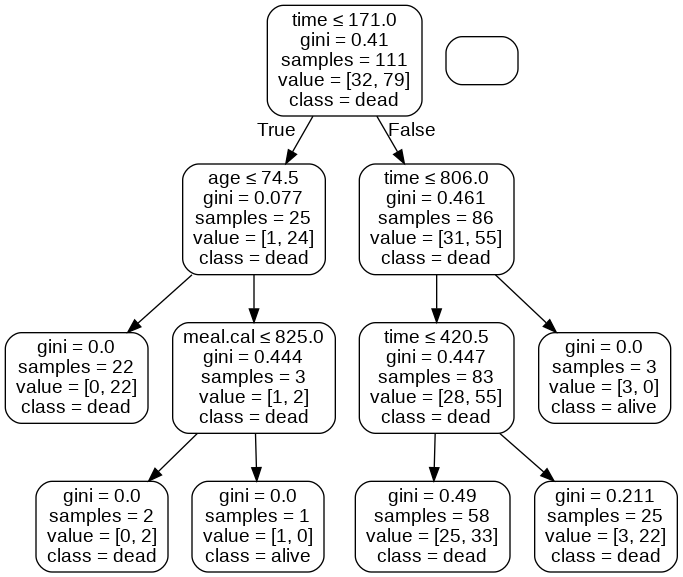

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf , out_file = dot_data ,filled = False , rounded = True , feature_names = list(x_train.columns.values), class_names = list(y_train),special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [ ]:
import numpy as np
results=dict(zip(x_train.columns , np.round(clf.feature_importances_ ,2)))
sorted(results.items(),key = lambda x: x[1], reverse = True)

[('time', 0.84),
 ('meal.cal', 0.11),
 ('age', 0.05),
 ('sex', 0.0),
 ('ph.ecog', 0.0),
 ('ph.karno', 0.0),
 ('pat.karno', 0.0),
 ('wt.loss', 0.0)]

In [ ]:
y_train_pred = clf.predict(x_train)

In [ ]:
print(pd.crosstab(y_train , y_train_pred))
round(metrics.accuracy_score(y_train , y_train_pred), 2)

col_0   alive  dead
status             
alive       4    28
dead        0    79


0.75

In [ ]:
y_pred = clf.predict(x_test)
print(pd.crosstab(y_test , y_pred))
round(metrics.accuracy_score(y_test, y_pred), 2)

col_0   alive  dead
status             
alive       1    14
dead        1    40


0.73